In [9]:
import cv2 as cv
import numpy as np
import Functions as f
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
img = cv.imread("Puzle_color.jpg", cv.IMREAD_GRAYSCALE)

1. Puzzles of the same shape are assigned to the same class.

In [11]:
y0 = np.array([2,4,1,2,5,2,5,6,6,7,5,8,6,1,9,5,6,3,8,8])
y45 = np.array([2,1,5,4,2,8,2,6,6,6,1,5,5,8,9,6,7,5,8,3]) 
y90 = np.array([2,5,8,6,1,8,6,1,2,4,8,9,5,6,2,3,5,6,5,7])
y180 = np.array([8,3,8,6,5,9,1,6,8,5,7,6,6,2,5,5,2,1,2,4])

In [12]:
target_list1 = [y0, y45, y180, y90]
angle_list1 = [
    np.array([45, 180, 90]),
    np.array([0.86, 1, 0.84]),
    np.array([1, 2, 3])
]

In [28]:
X_train1, y_train1, m1 = f.augmentation_img(img, "MONO_ROT", target_list1, angle_list1)

2. Reading second foto to increace X_train

In [29]:
img2 = cv.imread("Pm1_3.jpg", cv.IMREAD_GRAYSCALE)

In [30]:
angle_list2 = [np.array([])]
y0_2 = np.array([5,6,6,5,6,5,5,6,6,5])
target_list2 = [y0_2]

In [31]:
X_train2, y_train2, m2 = f.augmentation_img(img2, "MY_BLUE3",target_list2, angle_list2)

3. Merging 2 X_trains 

In [33]:
X_train, y_train = f.Merge_train(X_train1, y_train1, X_train2, y_train2)

4. Creating X_test from image

In [34]:
test_img = cv.imread("Red_3.jpg", cv.IMREAD_GRAYSCALE)

In [35]:
X_test = f.create_X_test(test_img, "RED", X_train.shape[1])

5. Validating to find best parameters

In [36]:
y_test_red3 = np.array([1,2,3,4,5,6,5,7,5,5,6,8])

In [37]:
neighbours_array = np.arange(1,10)
accuracy_list1 = []
accuracy_list2 = []
accuracy_list3 = []
accuracy_list4 = []
y_test_here = y_test_red3
X_test_here = X_test

for k in neighbours_array:
    clf1 = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean', n_jobs=-1)
    clf2 = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean', n_jobs=-1)
    clf3 = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='cosine', n_jobs=-1)
    clf4 = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='cosine', n_jobs=-1)
    
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    clf3.fit(X_train, y_train)
    clf4.fit(X_train, y_train)
    
    pred1 = clf1.predict(X_test_here)
    pred2 = clf2.predict(X_test_here)
    pred3 = clf3.predict(X_test_here)
    pred4 = clf4.predict(X_test_here)
    
    accuracy_list1.append(np.sum(pred1 == y_test_here) / pred1.size)
    accuracy_list2.append(np.sum(pred2 == y_test_here) / pred2.size)
    accuracy_list3.append(np.sum(pred3 == y_test_here) / pred3.size)
    accuracy_list4.append(np.sum(pred4 == y_test_here) / pred4.size)

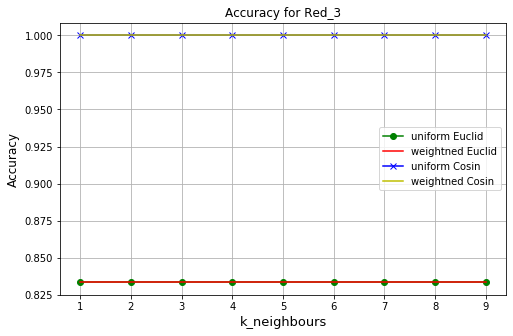

In [40]:
fig = plt.figure(figsize=(8, 5))
plt.plot(neighbours_array, accuracy_list1, color="g", label='uniform Euclid', marker='o')
plt.plot(neighbours_array, accuracy_list2, color="r", label='weightned Euclid')
plt.plot(neighbours_array, accuracy_list3, color="b", label='uniform Cosin', marker='x')
plt.plot(neighbours_array, accuracy_list4, color="y", label='weightned Cosin')
plt.grid()
plt.legend()

plt.title("Accuracy for Red_3")
plt.xlabel("k_neighbours", fontsize=13)
plt.ylabel("Accuracy", fontsize=12);

6. Predicting codes for puzzles and view it

In [41]:
clf = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='cosine', n_jobs=-1)

In [42]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='distance')

7. Download the predicted image or view it right here

In [ ]:
f.view_code(test_img, "RED", True, clf, X_test)

In [47]:
cv.imwrite("experiment_red3.jpg", f.view_code(test_img, "RED", True, clf, X_test))

True